In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [5]:
# Exploratory Data Analysis
print("First 5 rows of the dataset:\n", df.head())
print("Dataset Info:\n", df.info())
print("\nDataset statistics:\n", df.describe())

First 5 rows of the dataset:
     User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
Dataset Info:
 None

Dataset statistics:
             User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+0

In [7]:
# Step 1: Data Pre-processing
# Check for any missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [9]:
# Scaling the 'EstimatedSalary' for clustering
scaler = StandardScaler()
df['EstimatedSalary'] = scaler.fit_transform(df[['EstimatedSalary']])

In [11]:
# Step 2: Determine the optimal number of clusters using the Elbow Method
inertia = []  # To store inertia values for different k values
for k in range(1, 11):  # Test for k from 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df[['EstimatedSalary']])
    inertia.append(kmeans.inertia_)


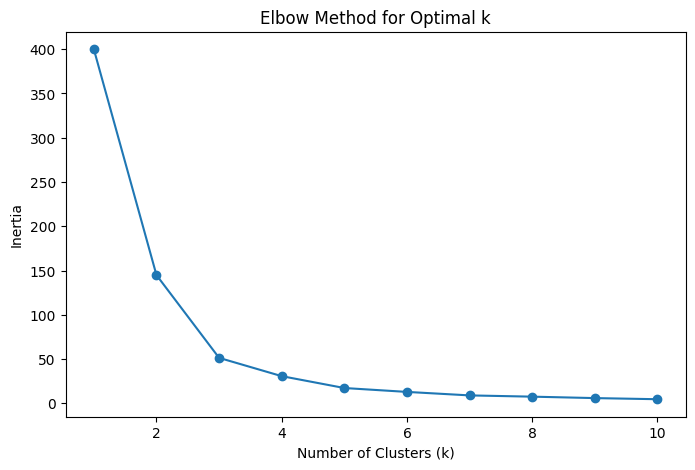

In [12]:
# Plotting the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


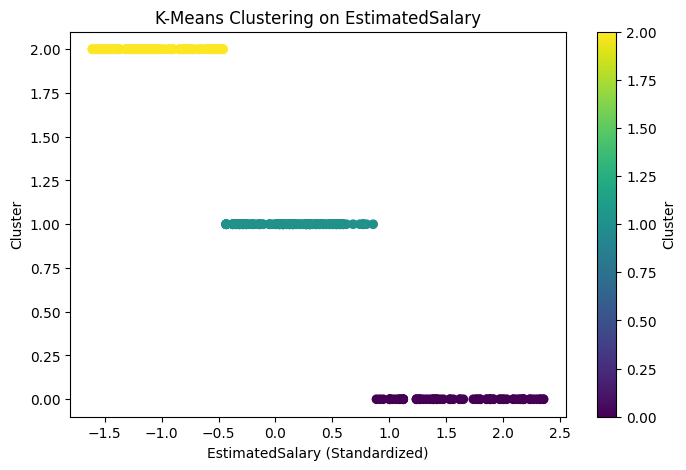

Cluster distribution:
Cluster
1    185
2    141
0     74
Name: count, dtype: int64


In [14]:
# Based on the elbow plot, choose the optimal number of clusters
optimal_k = 3  # Set based on observed elbow point

# Step 3: Apply K-Means Clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df['Cluster'] = kmeans.fit_predict(df[['EstimatedSalary']])

# Step 4: Visualize the Clusters
plt.figure(figsize=(8, 5))
plt.scatter(df['EstimatedSalary'], df['Cluster'], c=df['Cluster'], cmap='viridis', marker='o')
plt.xlabel('EstimatedSalary (Standardized)')
plt.ylabel('Cluster')
plt.title('K-Means Clustering on EstimatedSalary')
plt.colorbar(label='Cluster')
plt.show()

# Step 5: Model Evaluation
# Display cluster distribution
print("Cluster distribution:")
print(df['Cluster'].value_counts())
